In [3]:
import numpy as np
from copy import deepcopy

from rdkit import Chem
from rdkit.Chem import BRICS

import sys
sys.path.append('../molecules')
from conversion import mol_from_smiles, mol_to_smiles

In [4]:

def break_on_bond(mol, bond, min_length=3):
    if mol.GetNumAtoms() - bond <= min_length:
        return [mol]

    broken = Chem.FragmentOnBonds(
        mol, bondIndices=[bond],
        dummyLabels=[(0, 0)])

    res = Chem.GetMolFrags(
        broken, asMols=True, sanitizeFrags=False)

    return res

In [12]:
def fragment_iterative(mol, min_length=3):

    bond_data = list(BRICS.FindBRICSBonds(mol))

    try:
        idxs, labs = zip(*bond_data)
    except Exception:
        return []

    bonds = []
    for a1, a2 in idxs:
        bond = mol.GetBondBetweenAtoms(a1, a2)
        bonds.append(bond.GetIdx())

    order = np.argsort(bonds).tolist()
    bonds = [bonds[i] for i in order]

    frags, temp = [], deepcopy(mol)
    for bond in bonds:
        res = break_on_bond(temp, bond)

        if len(res) == 1:
            frags.append(temp)
            break

        head, tail = res

        frags.append(head)
        temp = deepcopy(tail)

    return frags


In [14]:
def break_into_fragments(mol, smi):
    frags = fragment_iterative(mol)

    if len(frags) == 0:
        return smi, np.nan, 0

    if len(frags) == 1:
        return smi, smi, 1

    return smi, np.nan, 0

In [18]:

smiles = '*C1OC(C(=O)O)=CC(N)C1*'
mol = mol_from_smiles(smiles)

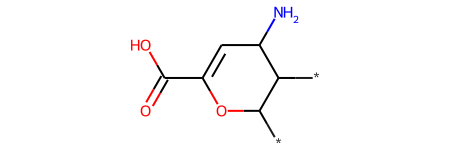

In [19]:
mol

In [17]:
break_into_fragments(mol, smiles)

('CCCOCc1cc(c2ncccc2)ccc1', nan, 0)

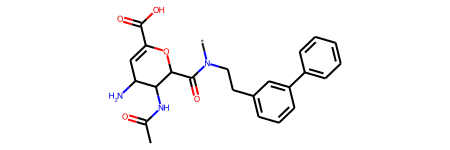

In [48]:
MolFromSmiles("N(*)(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O")

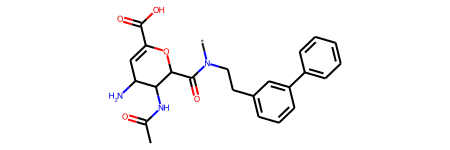

In [57]:
MolFromSmiles("N(*)(CCc1cccc(c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O")